COMP2200 - Brianna Lindsay 45428239

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import datetime as dt
from datetime import datetime
import matplotlib.dates as mdates
sns.set(rc={'figure.figsize':(16,10)})

In [2]:
# SOURCE: https://stackoverflow.com/questions/47648133/mape-calculation-in-python
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Data driven prediction models of energy use of appliances in a low-energy house
### Predicting Energy Consumption
This paper aims to explore the electricity consumption through analysis of tracable signs that result from use of domestic appliances, i.e. temprature, humidity, vibrations, light and noice. through the use of linear regression prediction to explore the questions 
* Is the weather data obtained from a nearby weather station representative enough to improve the appliances energy consumption prediction? 
* Can the temperature and humidity measurements from a wireless network help in the energy prediction?
* From all the data used in prediction models, which parameters are the most important in energy prediction?

In [3]:
dftest = pd.read_csv('data/testing.csv')
dftrain = pd.read_csv('data/training.csv')
df= dftest.append(dftrain)

## DataSet Exploration and analysis
*In order to simplify data for data exploration, training and testing have been combined to ensure both data sets are clean and came from the same original data sets.*

***
### Variables
this section explore what variables are recorded and the type of data recorded.

| lable      | variable                     | unit |
|------------|------------------------------|-----:|
| date       |year - month - day hour:min:s |   WH |
| appliances |appliance energy consumption  |   WH |
| lights     |light energy consumption      |   WH |
| T1         |temperature in kitchen        |    C |
| RH_1       |humidity in kitchen area      |    % |
| T2         |temperature in living room    |    C |
| RH_2       |humidity in living room area  |    % |
| T3         |temperatue in laundry room    |    C |
| RH3        |humidity in laundry room area |    % |
| T4         |temperatue in office room     |    C |
| RH4        |humidity in office room       |    % |
| T5         |temperatue in bathroom        |    C |
| RH5        |humidity in the bathroom      |    % |
| T6         |temperatue outside (north)    |    C |
| RH6        |humidity outside (north)      |    % |
| T7         |temperatue in ironing room    |    C |
| RH7        |humidity in ironing room      |    % |
| T8         |temperature in teenager room (2)|    C |
| RH8        |humidity in teenager room (2) |    % |
| T9         |temperature in parents room   |    C |
| RH9        |humidity in parents room      |    % |
| T_out      |temperature outside (from chievres weather station)|    C |
| Press_mm_hg|Pressure from chievers weather station) | MM HG |
| RH_out     |humidity outside(from chieveres weather station) |    % |
| Windspeed  |windspeed (from chieveres weather station) |    m/s |
| visability |visability (from chieveres weather station) |   km |
| tdewpoint  |tDewpoint (from chieveres weather station) |    c |
| rv1        |Random variable 1             |non dimensional|
| rv2        |Random variable 2             |non dimensional|
| NSM        |Number of seconds from midnight|    s |
| weekstatus |week status (Weekend {0} or weekday {1})  |factor/categorical |
| day of week|day of the week               | factor/categorical |


In [4]:
# confim variables
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [5]:
# check count of non null data points and they type of data each variable records
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19735 entries, 0 to 14802
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Data Recorded 
this section check the rows of data to ensure data frames are clean.

In [6]:
# 32 variables with 19735 rows of data
df.shape

(19735, 32)

In [7]:
# display the first 5 rows of data
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [8]:
# check if data is clean (no null values)
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

### Distribution of data
#### Appliances energy consumption distribution
From the histogram we can see that appliances is positively skewed with most appliance wattage falling between 0 to 200WH, furthermore the box plot shows there are a significant proportion of outliers in the upper limit and confirms the positive skew of the data. 
##### Intersting points
* the mean is around 40-50.
* there are only 2 outliers above 1000 watts
* there are no lower rage outliers
* there is a long positive tail for this data set

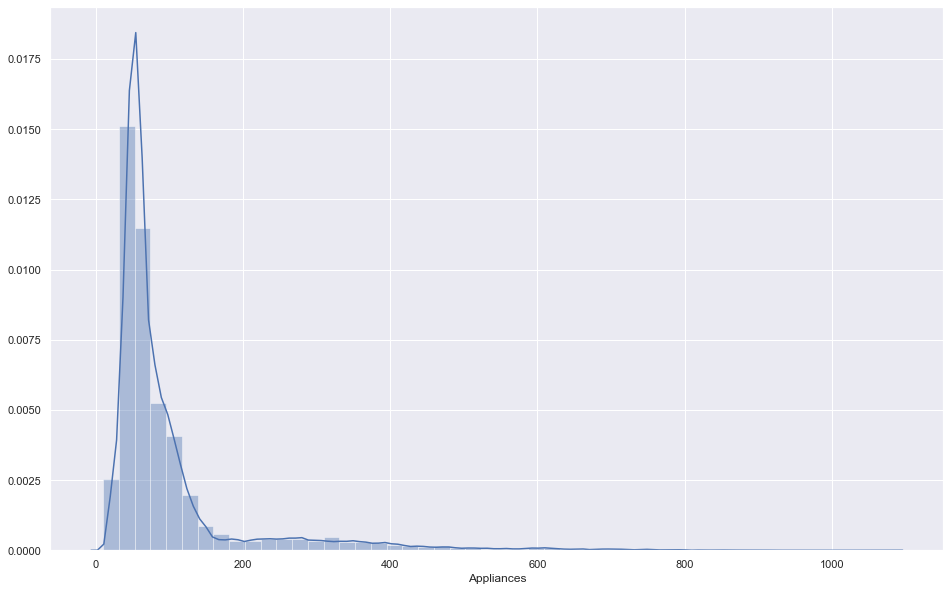

In [9]:
# histogram
sns.set(rc={'figure.figsize':(16,10)})
sns.distplot(df.Appliances)

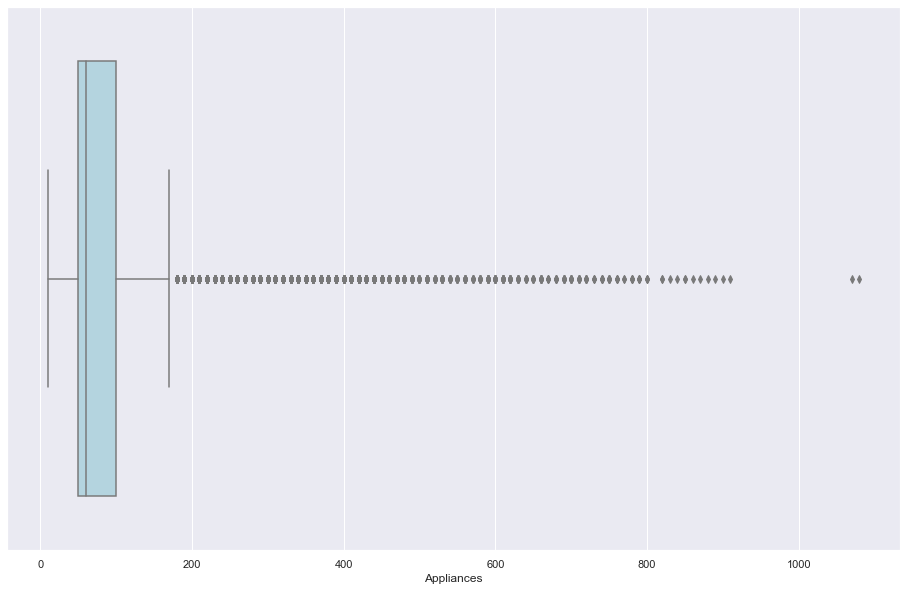

In [10]:
# boxplot
dfboxplot = sns.boxplot(x=df['Appliances'], color = 'lightblue')

### testing and training
our data set is seperated into two data frames, training and tesing utilizing CARET'S create data participation function. 
#### Training 
Training is 75% of the data and is used for the traning of the model. There are 32 variables and 14803 rows of data.

In [11]:
# check the shape of training
dftrain.shape

(14803, 32)

In [12]:
# check the data in training
dftrain.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


##### Line plot
from the line plot below we can see the appliances consumption over time, it is clear that ther is no clear trend in appliance use overtime apart from the 2 small periods of low appliance watt in february & april.

([], <a list of 0 Text major ticklabel objects>)

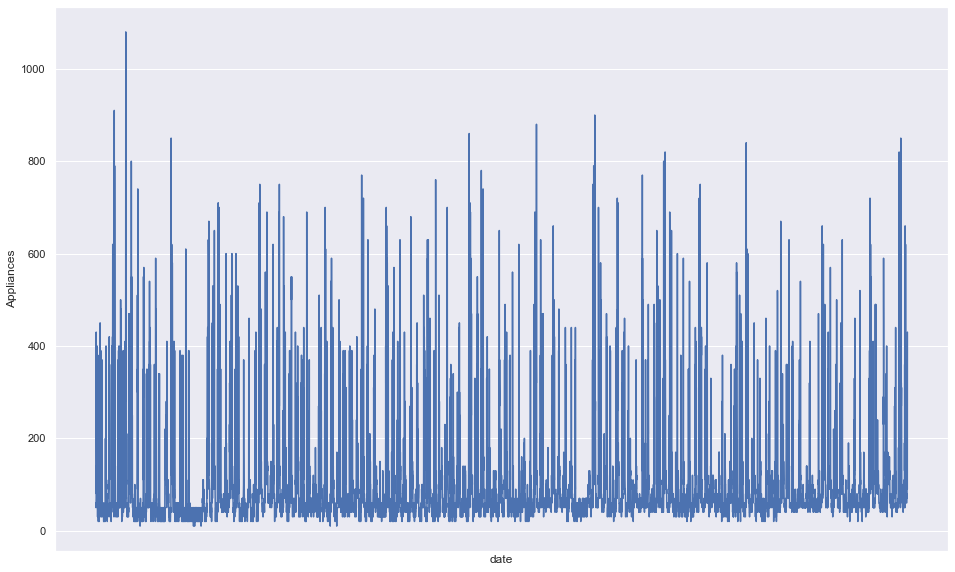

In [13]:
# create lineplot for training data
sns.lineplot(data = dftrain, x="date", y="Appliances")
plt.xticks([]) # line plot x lables have to be left out as my computer isnt powerful enough to run code (takes 30+ mins to generate graph)

#### Testing 
Testing is the other 25% of the data and is used for the testing the accuracy of the model. There are 32 variables and 4932 rows of data.

In [14]:
# check shape of test data
dftest.shape

(4932, 32)

In [15]:
# display the first 5 rows of data
dftest.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


##### Line plot
line plot below shares a similar story to the previous line graph, reinforcing the lack of a trend in appliance use overtime apart from the 2 small periods of low appliance watt in february & april.

([], <a list of 0 Text major ticklabel objects>)

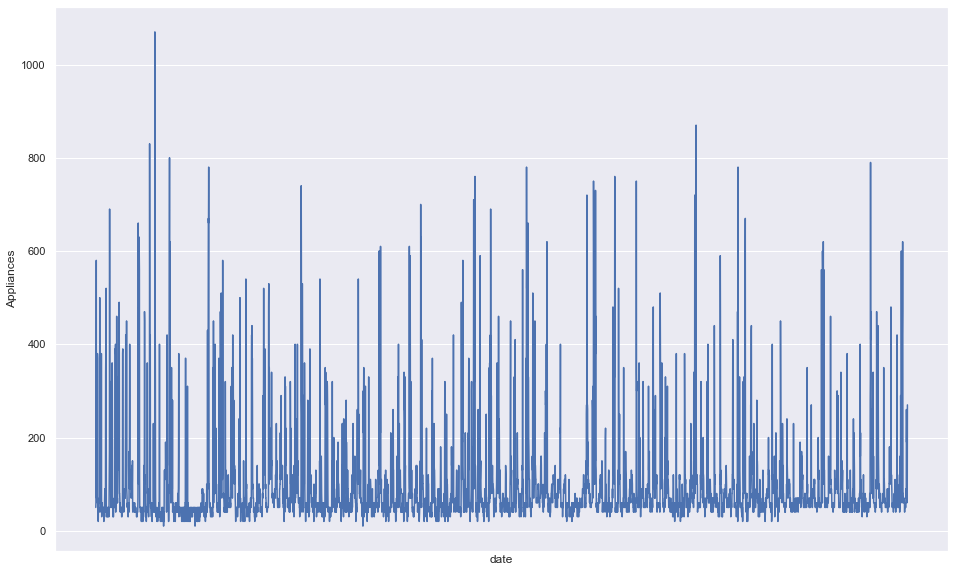

In [16]:
# create line plot for test
sns.lineplot(data = dftest, x="date", y="Appliances")
plt.xticks([])# line plot x lables have to be left out as my computer isnt powerful enough to run code (takes 30+ mins to generate graph)

### Correlation
*The plot below explores the relationship with Appliances, lights, Temperature and humidity of the kitchen, Temperature and humidity of the living room & Temperature and humidity of the laundry - Appendix 1,2,3 hold correlation plots for other variables*


This matrixs shows us a few intresting points

   * there is minimial correlation between a room and its humidity
   * there is no negitive correlation between the variables
   * lights points appear in neat rows as it is a intager
   
there is 6 relationships of interest as shown below: 

   * there is a strong positive correlation between kitchen temperature and laundry room temperature (0.89)
   * there is a strong positive correlation between kitchen temperature & humidity of the lounge room (0.84)
   * there is a strong positve correlaiton between kitchen humidity and the humidity of the lounge room (0.84)
   * there is a strong positive correlation between kitchen humidity and humidity of the lounge room (0.80)
   * there is a strong positive correlation between lounge room temperature and laundry room temperature (0.74)
   * there is a positive correlation betwenn lounge room humidity and laundry room humidity (0.68)

In [17]:
# SOURCE: https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another       
# Function to format the upper portion of paired plot - circles represent the size of the correlation, colour represents positive-negitive
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = 40
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

C:\Users\briel_0uox9gs\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


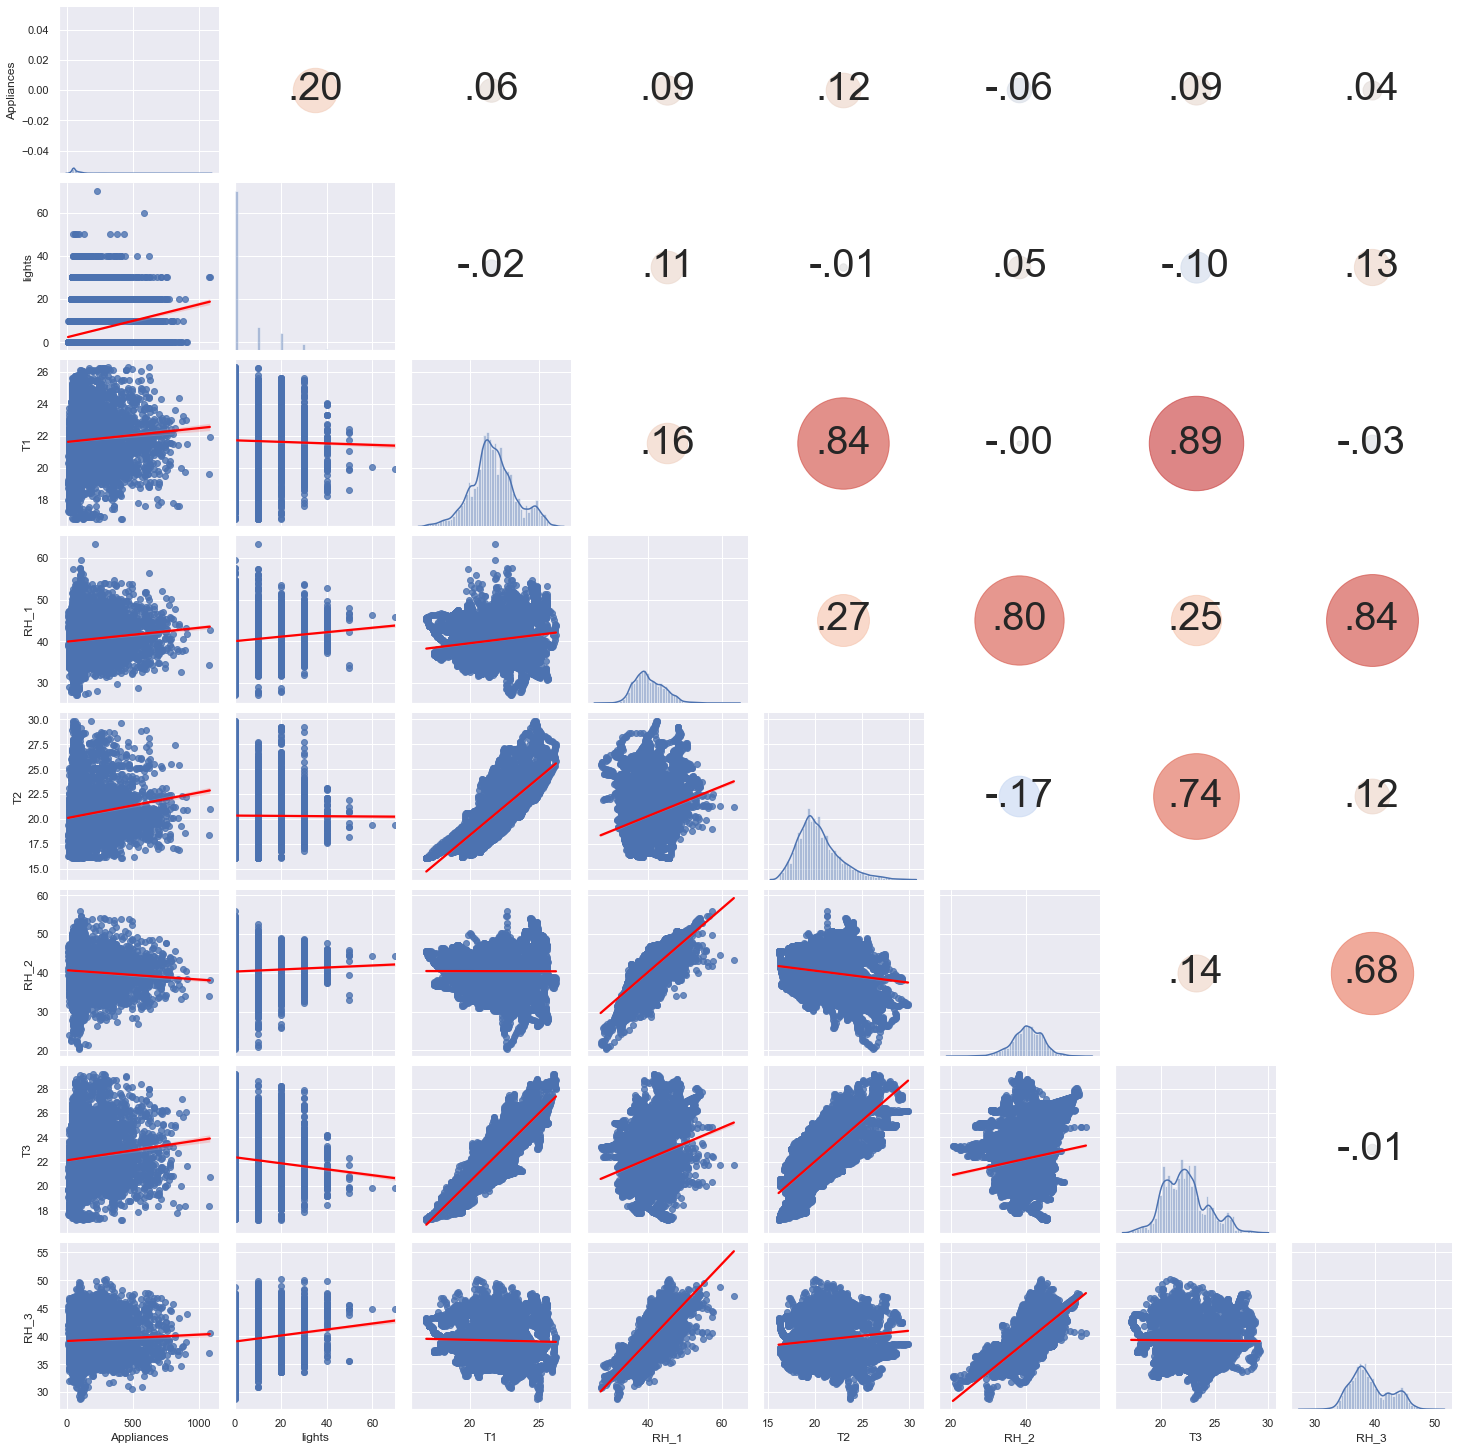

In [18]:
# creates Pair Grid for all data
plots = df[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3']]
g = sns.PairGrid(plots)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot, line_kws = {'color': 'red'})
g.map_upper(corrdot)

### Heat map 
*This section of the report aims to identify any time trends in the data in regard to appliance consumption through the use of 4 combined heatmaps documenting the appliance consumption hourly for 4 weeks*

from the heatmaps we can see majority of the appliance consumption is below 1000 and day of the week doesnt seem to impact the amount of energy used, however energy consumption rises around 7am and 5pm, thus time of day could be a predictor of energy consumption.

In [19]:
def HMdata (dt):
    # create a dictionary with a structure suitable for heatmap
    d = dict()
    time_lst = list(range(24))
    
    for i in time_lst:
        d[i] = {}
    for i in time_lst:
        for j in days:
            d[i][j] = 0
    # update d[I][j] values which is the sum of Appliances in the same hour of the same days. 
    for i in range(dt.shape[0]): # go over rows of dt
        h = datetime.strptime(dt.iloc[i]['date'], "%Y-%m-%d %H:%M:%S").hour # get hour
        wd_ind = datetime.strptime(dt.iloc[i]['date'], "%Y-%m-%d %H:%M:%S").weekday() # get day index
        wd = days[wd_ind] # get day
        aec = dt.iloc[i]['Appliances'] # get appliances energy usage 
        d[h][wd] += aec # update appliances energy usage
        
    d = pd.DataFrame({'Saturday': [d[x]['Saturday'] for x in d],
                       'Sunday': [d[x]['Sunday'] for x in d],
                       'Monday': [d[x]['Monday'] for x in d],
                       'Tuesday': [d[x]['Tuesday'] for x in d],
                       'Wednesday': [d[x]['Wednesday'] for x in d],
                       'Thursday': [d[x]['Thursday'] for x in d],
                       'Friday': [d[x]['Friday'] for x in d],})
    return d

In [20]:
# preparation - all data
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour = ['1', '2', '3', '4', '5', '6', '7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']

heat_map = pd.DataFrame({'idx': df['date'], 'date': df['date'], 'Appliances': df['Appliances']})
heat_map.date=heat_map.date.astype('str')
heat_map.idx=heat_map.idx.astype('datetime64[ns]')
heat_map.set_index('idx', inplace=True)

# prepare - select a portion of data
hm1 = HMdata(heat_map ['2016-01-11':'2016-01-17'])
hm2 = HMdata(heat_map ['2016-01-18':'2016-01-24'])
hm3 = HMdata(heat_map ['2016-01-25':'2016-01-31'])
hm4 = HMdata(heat_map ['2016-02-01':'2016-02-07'])


[Text(717.3739130434783, 0.5, 'hour of day'), Text(0.5, 8.0, 'Day of Week')]

<Figure size 576x396 with 0 Axes>

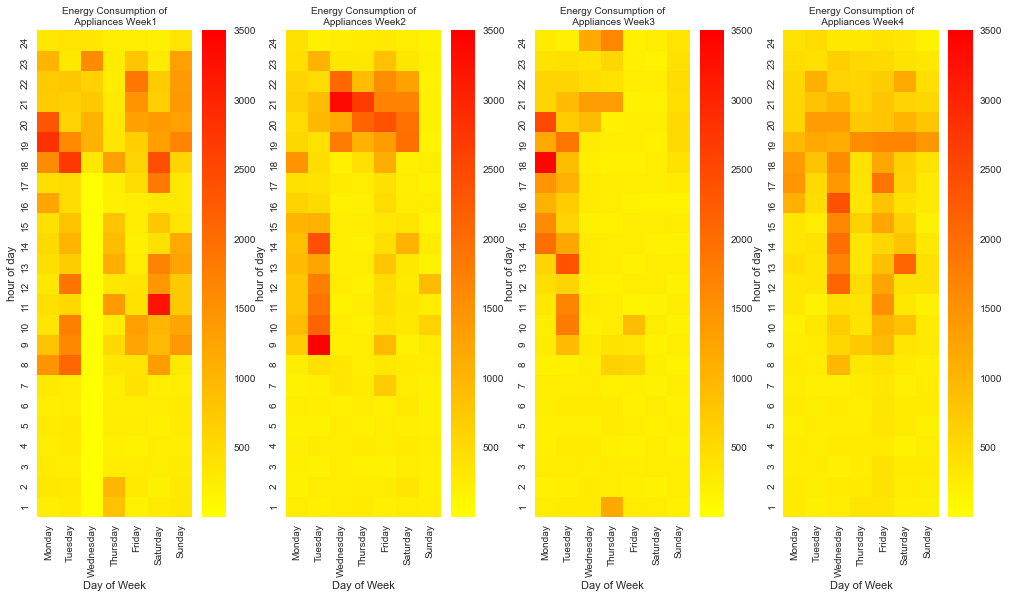

In [21]:
plt.style.use('seaborn')
plt.tight_layout()
#creates heatmap
fig,(plt1,plt2,plt3,plt4) = plt.subplots(ncols=4,nrows=1,figsize=(14,8))
plt1 = sns.heatmap(hm1, annot=False,linewidths=0, ax=plt1, cmap="autumn_r", vmin=1, vmax=3500, cbar=True,xticklabels=days,yticklabels=hour)
plt2 = sns.heatmap(hm2, annot=False, linewidths=0, ax=plt2,cmap="autumn_r",vmin=1, vmax=3500,cbar=True,xticklabels=days,yticklabels=hour)
plt3 = sns.heatmap(hm3,annot=False, linewidths=0, ax=plt3,cmap="autumn_r",vmin=1, vmax=3500,cbar=True,xticklabels=days,yticklabels=hour)
plt4 = sns.heatmap(hm4,annot=False, linewidths=0, ax=plt4, cmap="autumn_r", vmin=1, vmax=3500, cbar=True, xticklabels=days, yticklabels=hour)
fig.tight_layout()
# rotates 
plt1.invert_yaxis()
plt2.invert_yaxis()
plt3.invert_yaxis()
plt4.invert_yaxis()
#add titles
plt1.axes.set_title("Energy Consumption of\n Appliances Week1", fontsize=10, y=1.01)
plt2.axes.set_title("Energy Consumption of\n Appliances Week2", fontsize=10, y=1.01)
plt3.axes.set_title("Energy Consumption of\n Appliances Week3", fontsize=10, y=1.01)
plt4.axes.set_title("Energy Consumption of\n Appliances Week4", fontsize=10, y=1.01)
#lables axis
plt1.set(xlabel='Day of Week', ylabel='hour of day')
plt2.set(xlabel='Day of Week', ylabel='hour of day')
plt3.set(xlabel='Day of Week', ylabel='hour of day')
plt4.set(xlabel='Day of Week', ylabel='hour of day')

## Linear modeling
### Modeling with numeric variables (Model 1)
**RMSE** (Indicates the absolute fit of the model): as the RMSE is so high it is can be assumed that the model 1 is not very accurate. [93.5714]. when testing the model similar RMSE is scored confirming the inaccuracy of our model. [93.5642]

**R2** (indicates the proportion of the variance for the dependent variable that is explained by the independednt variable): the low value of R2 tells us that not much of the variance of applience consumption is explained by the variables. [0.1718]. the testing indicates even less of the data is explained by the model. [0.1519]

**MAE** (tells us the difference between the predicted value and the actual value): as the MAE is very high we can expect a large error with our predictions.[53.2550]. through testing the model the MAE deceases slightly however it is still large indicating the model has a significant amount of errors. [52.0750]

**MAPE** (measures the size of error in percentage terms): 61% of the prediction is incorrect which is very high indicating model 1 is poor at predicting accuratly.[61.4941%]. the testing of the model improves slightly to 60% telling us that there is a 60% error rate in model 1. [60.1047%] 


In [22]:
# reset training DataFrame
dftrain = pd.read_csv('data/training.csv')
# remove the categorical variables
X_train = dftrain.drop(['date', 'Appliances','WeekStatus','Day_of_week'],axis = 1)
y_train = dftrain['Appliances']
X_test = dftest.drop(['date', 'Appliances','WeekStatus','Day_of_week'],axis = 1)
y_test = dftest['Appliances']
#check if values are correct
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14803, 28) (14803,)
(4932, 28) (4932,)


In [23]:
# model instatiation
model1 = LinearRegression()
# model training
model1.fit(X_train,y_train)
# Predicting on training and testing data
y_train_hat = model1.predict(X_train)
y_test_hat = model1.predict(X_test)
# calculating scores on training and testing sets using standard regression metrics
print("scores on training set: ")
print("RMSE: ",np.sqrt(mean_squared_error(y_train,y_train_hat)))
print("R2: ", r2_score(y_train,y_train_hat))
print("MAE: ", mean_absolute_error(y_train,y_train_hat))
print("MAPE: ", mean_absolute_percentage_error(y_train,y_train_hat))
print()
print("scores on testing set: ")
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_test_hat)))
print("R2: ", r2_score(y_test,y_test_hat))
print("MAE: ", mean_absolute_error(y_test,y_test_hat))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_test_hat))

scores on training set: 
RMSE:  93.57143468503801
R2:  0.17188056846730493
MAE:  53.255031292957206
MAPE:  61.49412441844212

scores on testing set: 
RMSE:  93.56425120887656
R2:  0.15199183390308568
MAE:  52.075015316595916
MAPE:  60.10475096677105


##### Residuals and appliance energy consumption -  linear regression model
From the scatter plot we can see the residules follow a linear trend, with a high proportion of the data clustered around 0 to 200 appliances energy consumption & 100 to -200 with a significant outlier at the top end of the data.

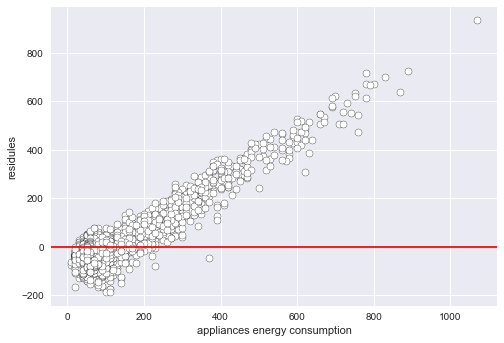

In [24]:
residual = y_test.values - y_test_hat
plt.scatter(y_test, residual, color ="white",edgecolor ='black')
plt.xlabel('appliances energy consumption')
plt.ylabel('residules')
plt.axhline(0,color = 'red')

### Modeling with numeric variables + Week status (Model 2)
**RMSE**: is very high for training, indicating a poor fit for the model 2 [93.4972]. similar reults are found when testing model 2 [93.9258]

**R2**: the low R2 indicates that not much of the variation of appliance consumption is explained by the model. [0.1733]. when testing the model significantly less of the variation is explained. [0.1452]

**MAE** : such a high MAE tell us the model is not very good at predicting appliance consumption as it indicates there is a large difference between actual and predicted. [53.2504]. when testing model 2 the similar results are found confirming the inaccuracy of model 2 [52.3522].

**MAPE**: 61% of the prediction results in errors meaning the model is not very accurate. [61.4123]. simarlarly testing the model there was 60% error rate, confirming the model isnt very good[60.6637].


In [25]:
# making categorical variables numeric (week status)
set(dftrain['WeekStatus'])
ws = pd.get_dummies(dftrain['WeekStatus'])
wstrain = dftrain.join(ws)

# making categorical variables numeric (Week Status)
wstest = dftest.join(ws)

# check tables
print(wstrain.shape)
print(wstest.shape)


(14803, 34)
(4932, 34)


In [26]:
# remove the categorical variables
X_train = wstrain.drop(['date', 'Appliances','WeekStatus','Day_of_week'],axis = 1)
y_train = wstrain['Appliances']
X_test = wstest.drop(['date', 'Appliances','WeekStatus','Day_of_week'],axis = 1)
y_test = wstest['Appliances']
#check if values are correct
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14803, 30) (14803,)
(4932, 30) (4932,)


In [27]:
# model instatiation
model1 = LinearRegression()
# model training
model1.fit(X_train,y_train)
# Predicting on training and testing data
y_train_hat = model1.predict(X_train)
y_test_hat = model1.predict(X_test)
# calculating scores on training and testing sets using standard regression metrics
print("scores on training set: ")
print("RMSE: ",np.sqrt(mean_squared_error(y_train,y_train_hat)))
print("R2: ", r2_score(y_train,y_train_hat))
print("MAE: ", mean_absolute_error(y_train,y_train_hat))
print("MAPE: ", mean_absolute_percentage_error(y_train,y_train_hat))
print()
print("scores on testing set: ")
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_test_hat)))
print("R2: ", r2_score(y_test,y_test_hat))
print("MAE: ", mean_absolute_error(y_test,y_test_hat))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_test_hat))

scores on training set: 
RMSE:  93.49722522017885
R2:  0.17319357453646622
MAE:  53.25049400657291
MAPE:  61.41239395222955

scores on testing set: 
RMSE:  93.92587733081689
R2:  0.14542405774676825
MAE:  52.352202729050816
MAPE:  60.66376535643314


##### residuals and appliance energy consumption - linear regression model
From the scatter plot we can see the residules follow a linear trend, with a high proportion of the data clustered around 0 to 200 appliances energy consumption & 100 to -200 with a significant outlier at the top end of the data. it is very similar to the previous residuals plot

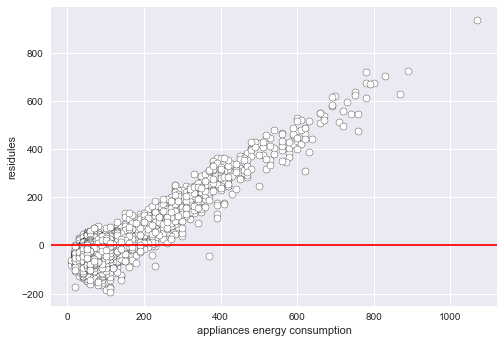

In [28]:
residual = y_test.values - y_test_hat
plt.scatter(y_test, residual, color ="white",edgecolor ='black')
plt.xlabel('appliances energy consumption')
plt.ylabel('residules')
plt.axhline(0,color = 'red')

### Modeling using numeric and categorical variables (Model 3)
**RMSE**: is very high for training, indicating a poor fit for the model 3 [93.2055]. similar reults are found when testing model 3 [94.2139]

**R2**: the low R2 indicates that not much of the variation of appliance consumption is explained by the model. [0.1783]. when testing the model even less of the variation is explained [0.1401]

**MAE** : such a high MAE tell us the model is not very good at predicting appliance consumption. [53.1389]. when testing model 3 there is still a large difference between predicted and actual. [52.8734].

**MAPE**: 61% of the prediction results in errors meaning the model is not very accurate. [61.3311%]. simarlarly testing the model there was 61% error rate, confirming the model isnt very good[61.3194%].


In [29]:
# making categorical variables numeric (Day of the week)
set(dftrain['Day_of_week'])
dow = pd.get_dummies(dftrain['Day_of_week'])
ctrain = wstrain.join(dow)

# making categorical variables numeric (Day of the week)
ctest= wstest.join(dow)


# check shapes of variables
print(ctrain.shape)
print(ctest.shape)

(14803, 41)
(4932, 41)


In [30]:
X_train = ctrain.drop(['date', 'Appliances','WeekStatus','Day_of_week'],axis = 1)
y_train = ctrain['Appliances']
X_test = ctest.drop(['date', 'Appliances','WeekStatus','Day_of_week'],axis = 1)
y_test = ctest['Appliances']
#check if values are correct
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14803, 37) (14803,)
(4932, 37) (4932,)


In [31]:
# model instatiation
model3 = LinearRegression()
# model training
model3.fit(X_train,y_train)
# Predicting on training and testing data
y_train_hat = model3.predict(X_train)
y_test_hat = model3.predict(X_test)
# calculating scores on training and testing sets using standard regression metrics
print("scores on training set: ")
print("RMSE: ",np.sqrt(mean_squared_error(y_train,y_train_hat)))
print("R2: ", r2_score(y_train,y_train_hat))
print("MAE: ", mean_absolute_error(y_train,y_train_hat))
print("MAPE: ", mean_absolute_percentage_error(y_train,y_train_hat))
print()
print("scores on testing set: ")
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_test_hat)))
print("R2: ", r2_score(y_test,y_test_hat))
print("MAE: ", mean_absolute_error(y_test,y_test_hat))
print("MAPE: ", mean_absolute_percentage_error(y_test,y_test_hat))

scores on training set: 
RMSE:  93.20557248110671
R2:  0.17834376492372528
MAE:  53.138912335056055
MAPE:  61.33117488093237

scores on testing set: 
RMSE:  94.21396344378743
R2:  0.1401737684058646
MAE:  52.873461360789165
MAPE:  61.319401498647494


##### Residuals and appliance energy consumption  - linear regression model
From the scatter plot we can see the residules follow a linear trend, with a high proportion of the data clustered around 0 to 200 appliances energy consumption & 100 to -200 with a significant outlier at the top end of the data. This follows the other models residuals plot.

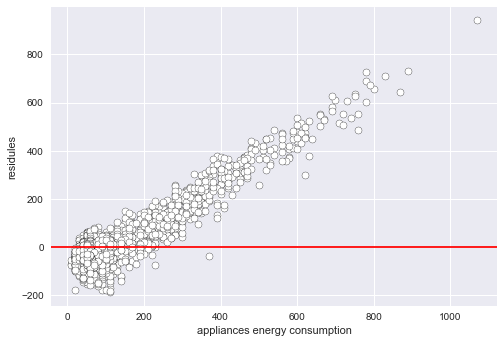

In [32]:
residual = y_test.values - y_test_hat
plt.scatter(y_test, residual, color ="white",edgecolor ='black')
plt.xlabel('appliances energy consumption')
plt.ylabel('residules')
plt.axhline(0,color = 'red')

#### Comparing the models
when comparing the models we can see that all do a poor job of predicting appliance consumption. model 1 explains more of the data set in testing, while model 2 & model 3 explains more of the training. all models had similar high MAE for training and testing indicating that there is a large difference between predicted and actual results. furthermore the MAPE is around 60 for training and testing for all the models meaning theres a 60% error rate for predicts.

from these scores we can conclude that all the models do a poor job of predicting appliance consumption. as all the results are very similar (confirmed by the residual plots) there is not best model to use however it can be denoted that adding the categoric variables doesnt improve the model, this is confirmed in the residuals plot of each of the linear regression models

## feature importance using RFE
*using model 3 as it has all variables (an no model had a significant better accuracy)*

from the graph we can see that the best number of features to use is 37(all the features) as it results in the smallest RMSE score meaning it is the best fit for the prediction of appliance consumption.

In [33]:
estimator = LinearRegression()
rmse_scores =[]
for i in range(1, 38):
    selector = RFE(estimator,n_features_to_select=i,step=1)
    selector = selector.fit(X_train,y_train)
    y_test_pred=selector.predict(X_test)
    rmse_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_scores.append(rmse_test)

<function matplotlib.pyplot.show(*args, **kw)>

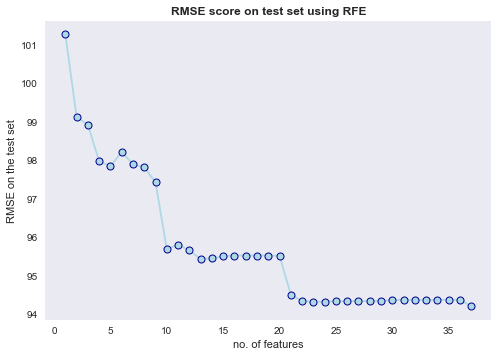

In [34]:
plt.grid()
plt.xlabel('no. of features')
plt.ylabel('RMSE on the test set')
plt.title('RMSE score on test set using RFE', fontweight = 'bold')
plt.plot(range(1,38),rmse_scores, marker = 'o',color = 'lightblue',markeredgewidth = '1',markeredgecolor = 'darkblue')
plt.show

### RFECV
when examining the RFECV scores of cross validation the best number of attributes to use would be 25-26 as it produces the best RFECV score. intrestingly there is a significant improvement in RFECV score as attributes are added up to 10 attributes after this the results increase gradually till they eventually peak at 20 and drop at 21. the RFEVC score plattoes after this point.

In [35]:
model = LinearRegression()
k = StratifiedKFold(n_splits=5)
rfecv = RFECV(estimator=model,step=1,cv=k,scoring='neg_mean_squared_error')
rfecv = rfecv.fit(X_train,y_train)

C:\Users\briel_0uox9gs\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [36]:
print('optimal number of features:', rfecv.n_features_)
print('best features:',X_train.columns[rfecv.support_])

optimal number of features: 25
best features: Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'T7', 'RH_7',
       'T8', 'RH_8', 'T9', 'T_out', 'Windspeed', 'Tdewpoint', 'Weekday',
       'Weekend', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')


<function matplotlib.pyplot.show(*args, **kw)>

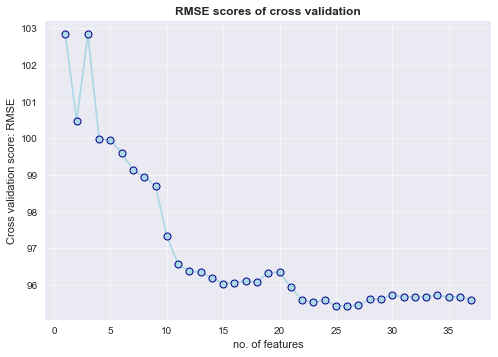

In [37]:
# plot number of features vs. cross-validation scores RMSE
plt.xlabel('no. of features')
plt.ylabel('Cross validation score: RMSE')
plt.title('RMSE scores of cross validation', fontweight = 'bold')

rmse = np.sqrt(-rfecv.grid_scores_)

plt.plot(range(1,len(rfecv.grid_scores_)+1),rmse, marker = 'o',color = 'lightblue',markeredgewidth = '1',markeredgecolor = 'darkblue')
plt.grid(alpha=0.5) 
plt.show

## Conclusion
in conlusion this exploration into the relationship between energy consumption of appliance and recored variables has shown that the energy consumption cant nesseasrrily be easially predicted using linear regression. however another model may be more appropriate as there is clear trends in the the data. 

## Appendix
#### Appendix A
Appendix a tells us that temperature in room 4 & 5 have a significant positive correlation, as well as temperature of room 4 and room 6 & room 5 and room 6. negitive correlations are  within temperatures of room 4, 5 & 6 with room humidity of room 6. there is no significant correlation between appliances and any of the variables

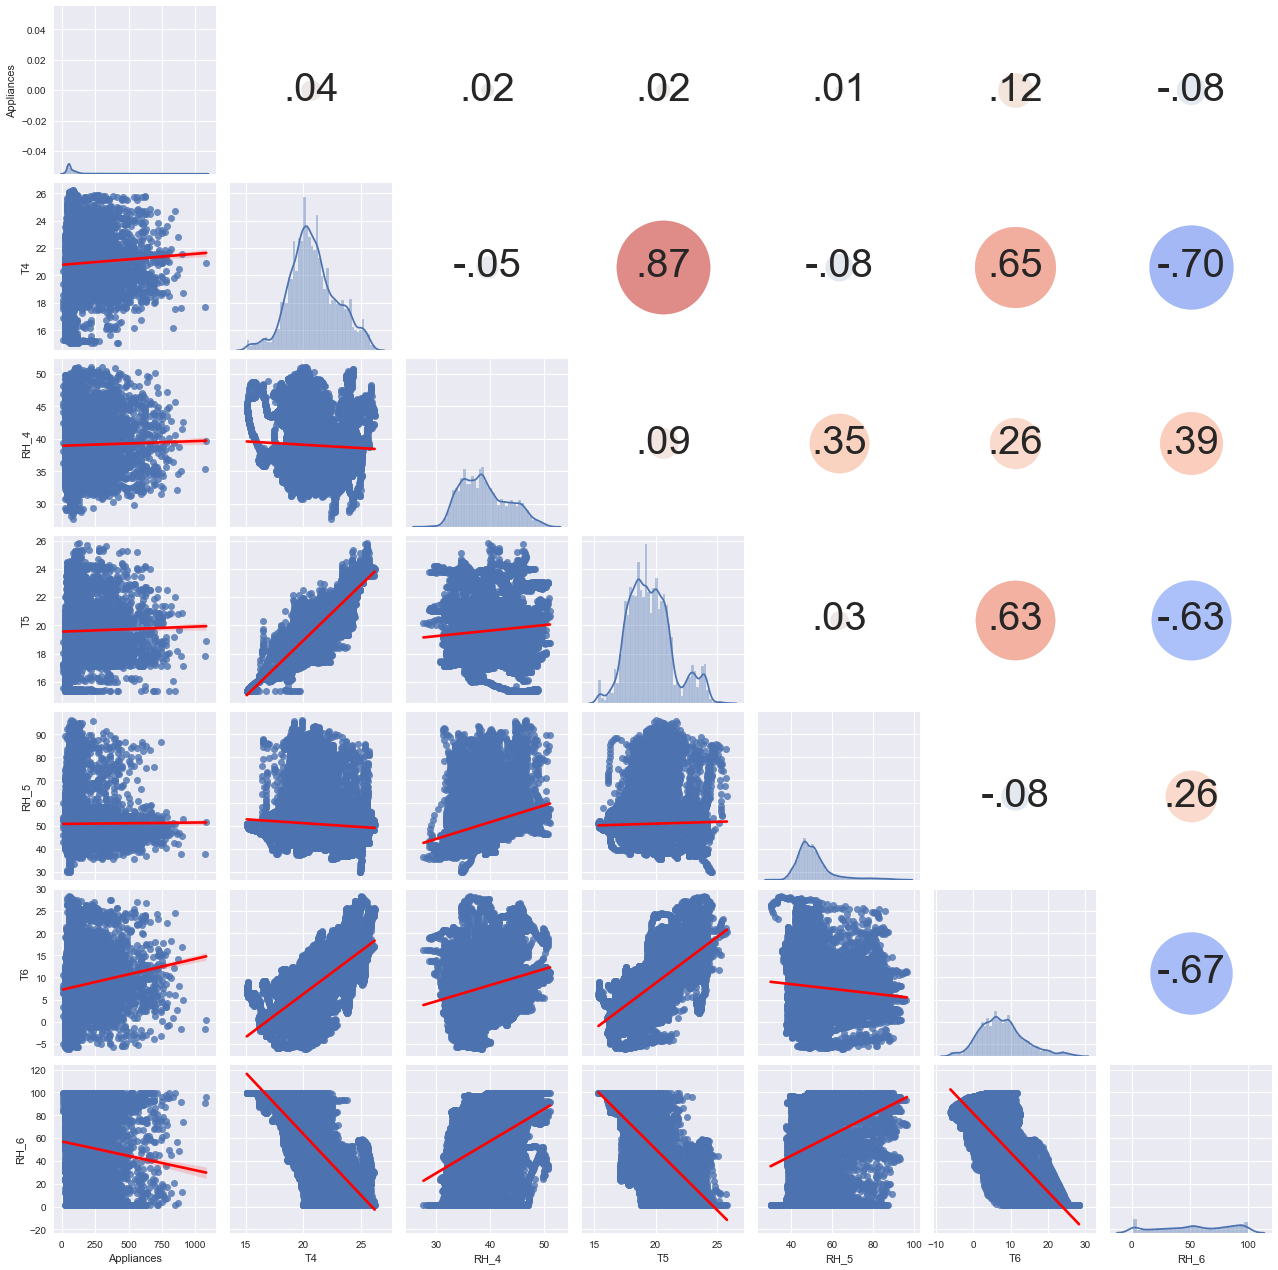

In [38]:
"""appendixs A - paired plot showing relationship between the energy consumption of appliances 
with the temperature and humidity of the office, bathroom, outside (north)"""
plotsA = df[['Appliances','T4','RH_4','T5','RH_5','T6','RH_6']]
g = sns.PairGrid(plotsA)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot, line_kws = {'color': 'red'})
g.map_upper(corrdot)

#### Appendix B
there is significant positive correlation between the temperature of room 7 and the temperatures of room 8 & 9 (seperatly), the humidity of room 7 is also positivelly correlated with the humidity in room 8 & 9. futher more the temperatures and humidities of room 8 & 9 are both positively correlated. again no significant correlation between Appliances and any of the other variables.

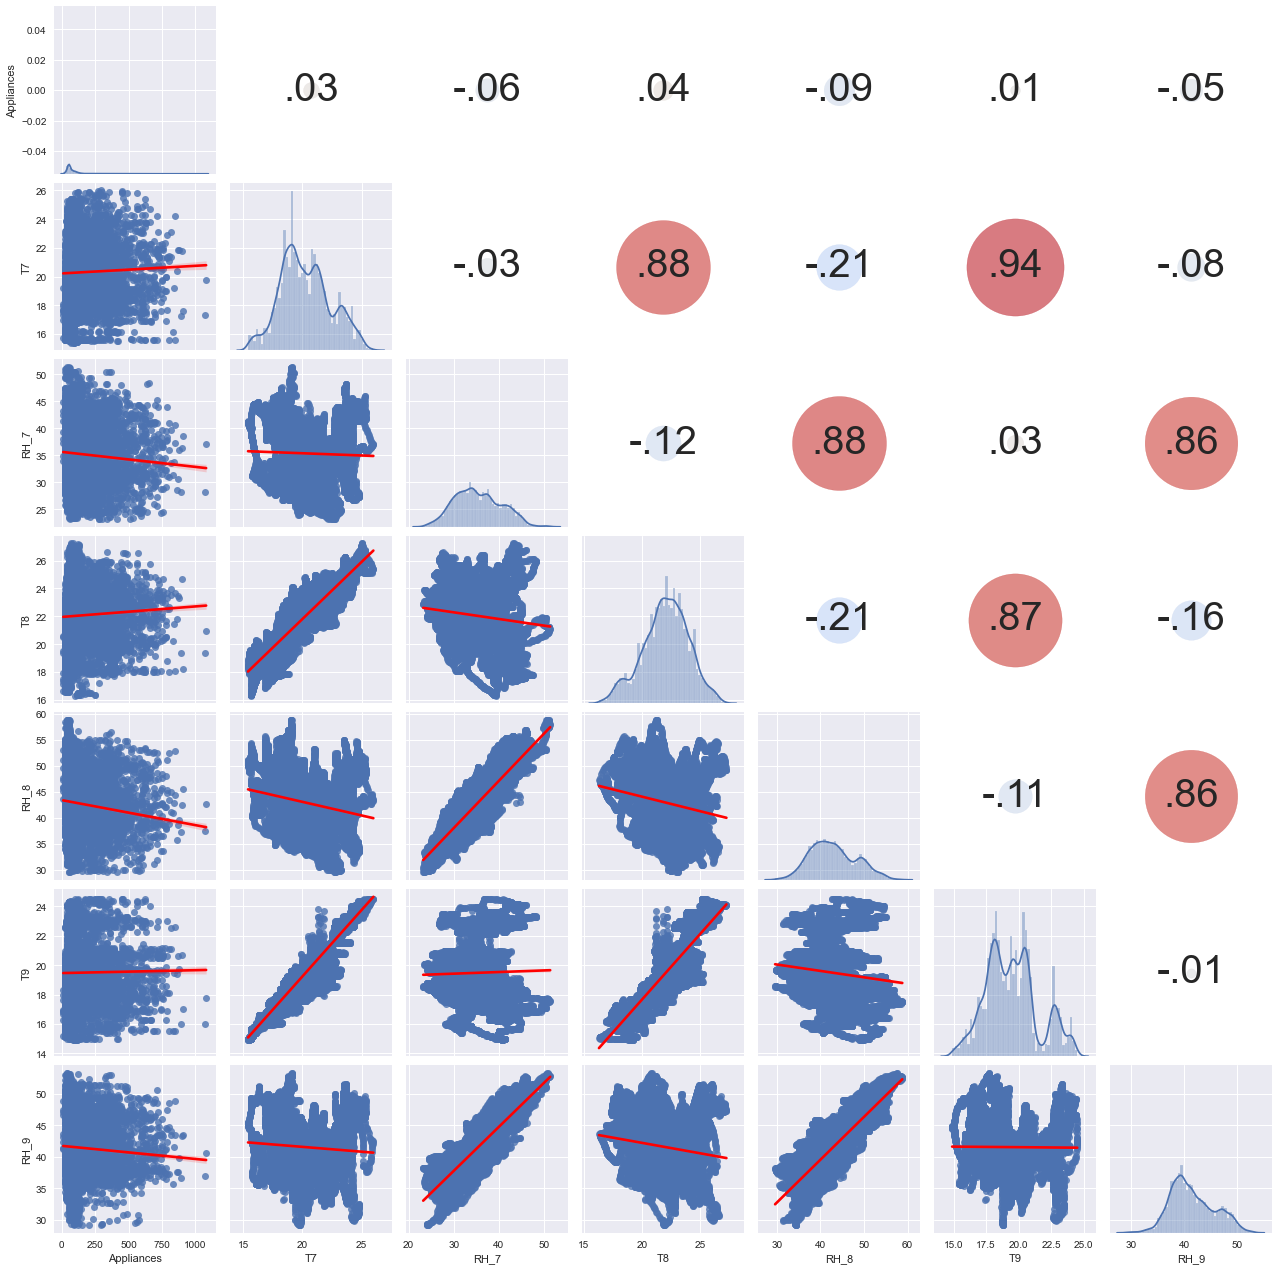

In [39]:
"""appendixs B - paired plot showing relationship between the energy consumption of appliances 
with the temperature and humidity of the ironing room, teenager room 2 & parents room"""
plotsB = df[['Appliances','T7','RH_7','T8','RH_8','T9','RH_9']]
g = sns.PairGrid(plotsB)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot, line_kws = {'color': 'red'})
g.map_upper(corrdot)

#### Appendix C
there is a perfect positive relationship betweeen random variable 1 & 2, also a significant positive relationship between temperature outside and the dew point. a slight negitive correlation exsits between  temperature outside and the humidity outside. again no significant correlations between Appliances and the other variables.

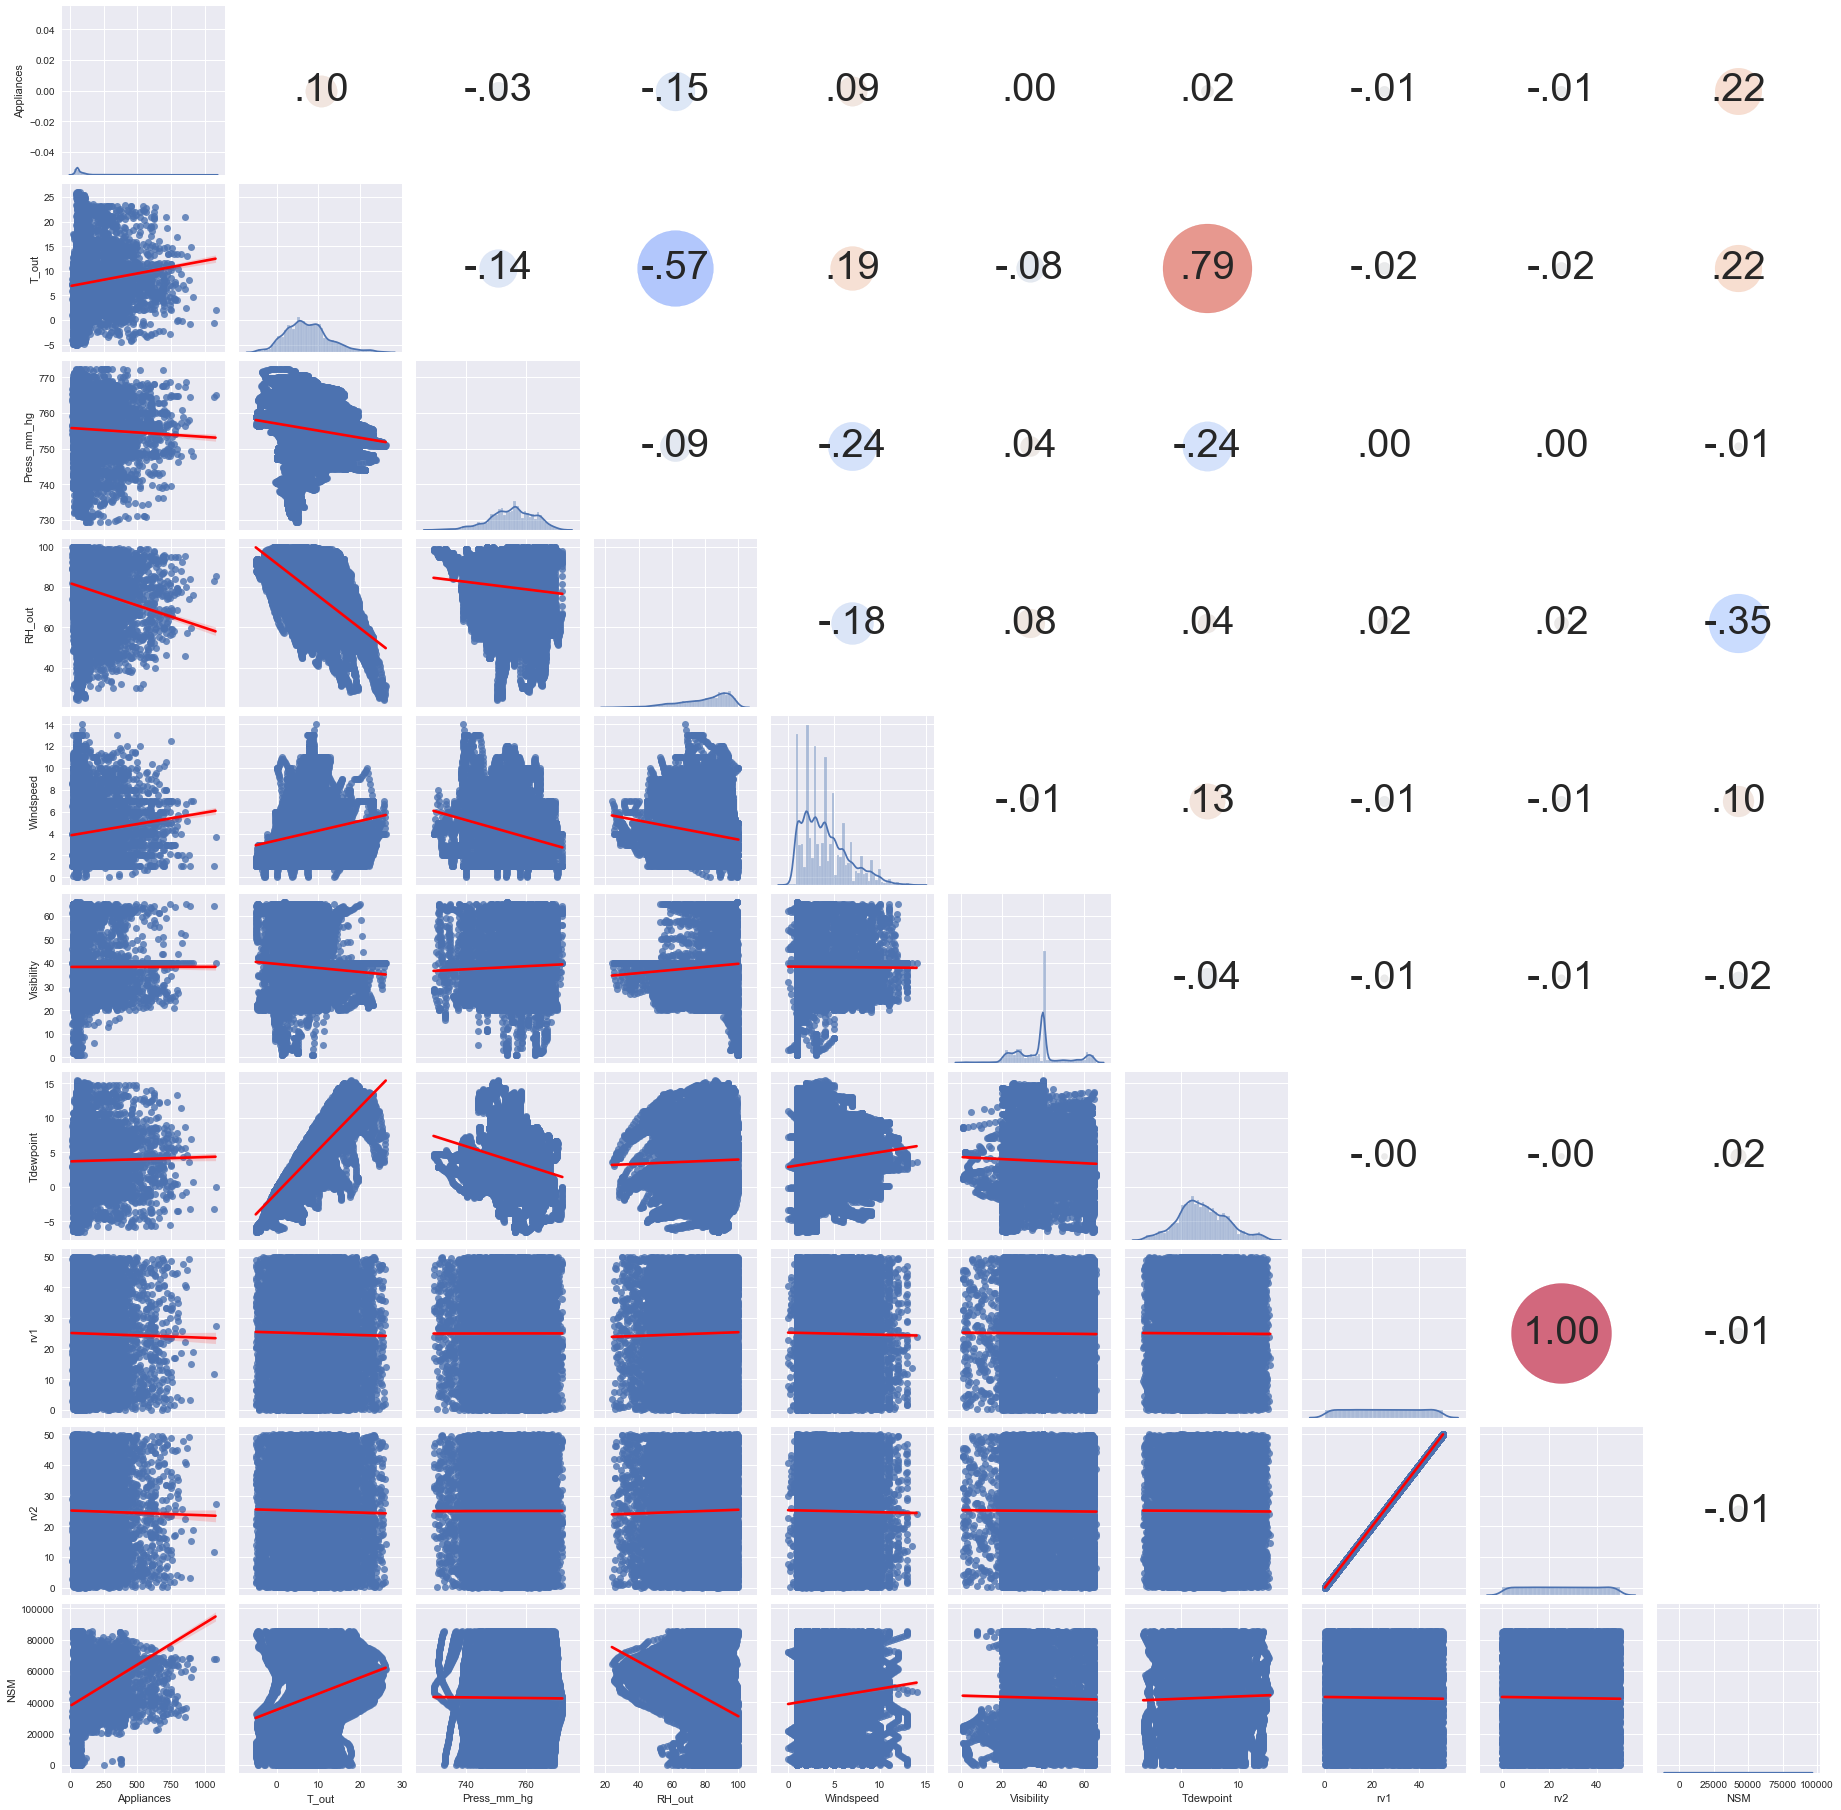

In [42]:
"""appendixs C - paired plot showing relationship between the energy consumption of appliances 
with the temperature and humidity of the office, bathroom, outside (north)"""

plotsC = df[['Appliances','T_out','Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM']]
g = sns.PairGrid(plotsC)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot, line_kws = {'color': 'red'})
g.map_upper(corrdot)